# TROPICAL TRENDSETTERS
### Robin Mikeal and Jef Hinton

# Overview: 

 We're looking to find some Tropical trends in this Hurricane data. 

 To do that, we'll be covering some common stats methods and some less common stats methods. 
  

### SECTION 1: 
Distributions with common parameters (e.g. median, mean) and plots KDEs for at least two 1D distributions; 
In this section you'll find medians, boxplots ilustrating percentages and skewedness, and then we'll also spend some time displaying what happens to hurricane windspeed once the hurricane impacts a landmass. 

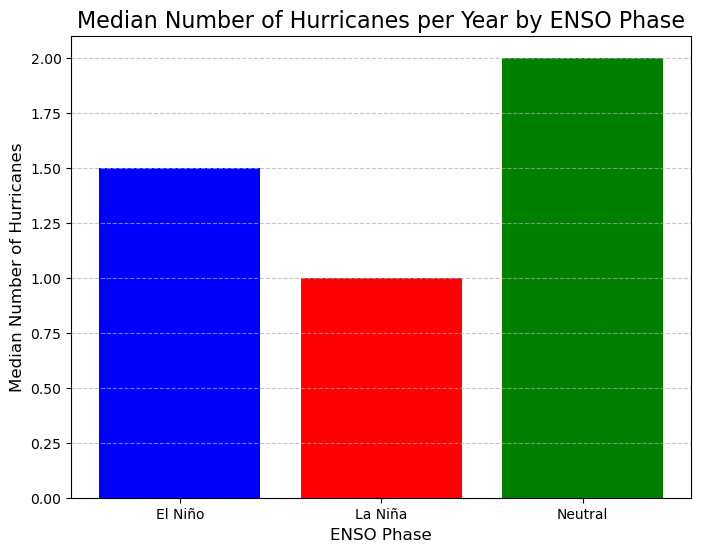

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load
df = pd.read_csv("Tropical_Storm_Dataset_AND_ENSO.csv")

# Count the number of unique hurricanes per year for each ENSO phase
hurricanes_per_year = df.groupby(["Year", "ENSO"])["Name"].nunique().reset_index(name="Hurricane Count")

# Calculate the median number of hurricanes for each ENSO phase
median_hurricanes = hurricanes_per_year.groupby("ENSO")["Hurricane Count"].median().reset_index()

# Plot the median number of hurricanes for each ENSO phase
plt.figure(figsize=(8, 6))
plt.bar(median_hurricanes["ENSO"], median_hurricanes["Hurricane Count"], color=["blue", "red", "green"])
plt.title("Median Number of Hurricanes per Year by ENSO Phase", fontsize=16)
plt.xlabel("ENSO Phase", fontsize=12)
plt.ylabel("Median Number of Hurricanes", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



#### The median number of Hurricanes per year looks like neutral is coming in at 2.0, El Nino is at 1.50 and La Nina is in third place with 1.00 

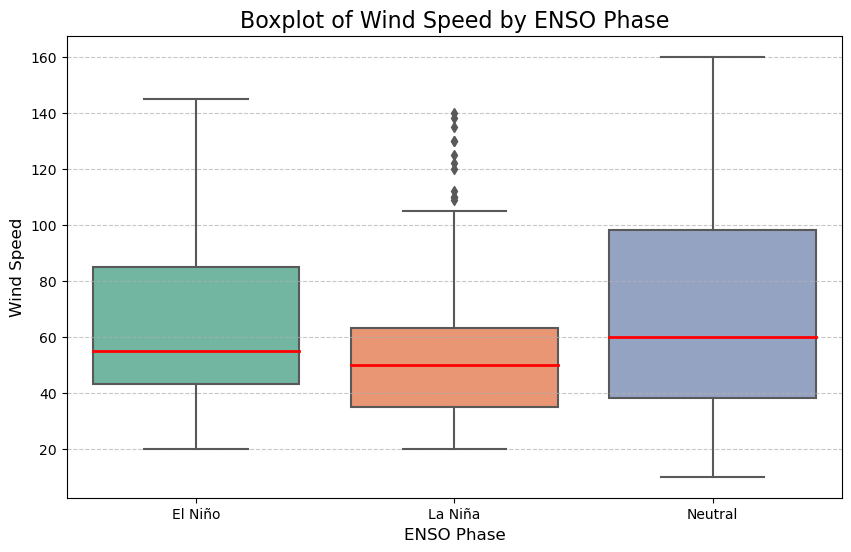

In [2]:
import seaborn as sns

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="ENSO", y="USA WIND", showfliers=True, palette="Set2", medianprops={"color": "red", "linewidth": 2})

# Add plot details
plt.title("Boxplot of Wind Speed by ENSO Phase", fontsize=16)
plt.xlabel("ENSO Phase", fontsize=12)
plt.ylabel("Wind Speed", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

This is interesting, so the medians windspeeds are similar, but the neutral ENSO phase has the longest whiskers which indicates the most variance, while la nina has the smallest variance, but alot of outliers. 

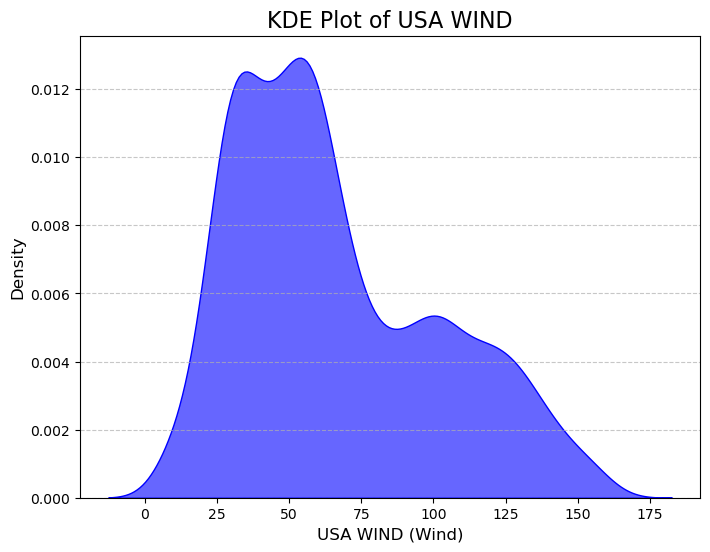

In [3]:
# KDE 1 Wind
# Plot the KDE for 'USA PRES'
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x="USA WIND", fill=True, color="blue", alpha=0.6)
plt.title("KDE Plot of USA WIND", fontsize=16)
plt.xlabel("USA WIND (Wind)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

This KDE plot shows that the wind has high density at around 40 mph and around 60 mph then a much lower frequency of readings above 100 mph and finally the tail does go out toward 175 mph

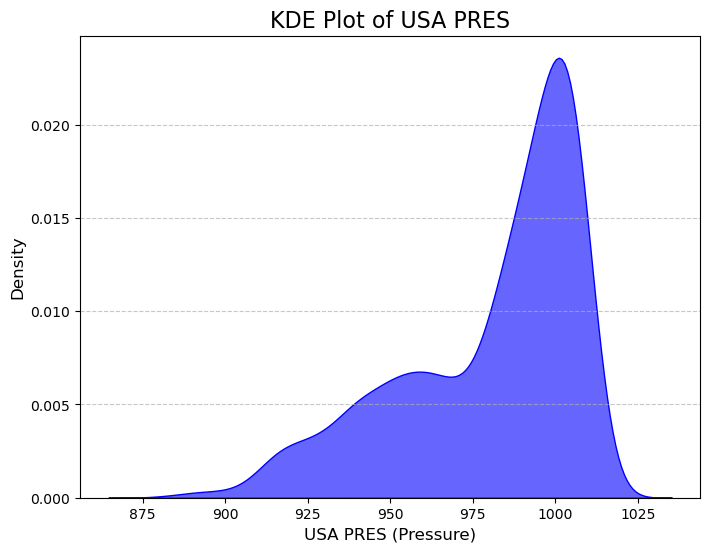

In [4]:
# KDE 2 Pressure

# Plot the KDE for 'USA PRES'
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x="USA PRES", fill=True, color="blue", alpha=0.6)
plt.title("KDE Plot of USA PRES", fontsize=16)
plt.xlabel("USA PRES (Pressure)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

This is looks like the opposite distriution as the wind plot. That makes sense, because at lower pressures we see higher windspeeds.

Most storms are reading USA Pressure values around 1000 and then some of those very low pressure values are corellated with the higher windspeeds. 

What would each storm look like plotted by wind over the duration of the storm and its mean and median?
What about the relationship of wind speed and being over land (rather than the warm ocean)?

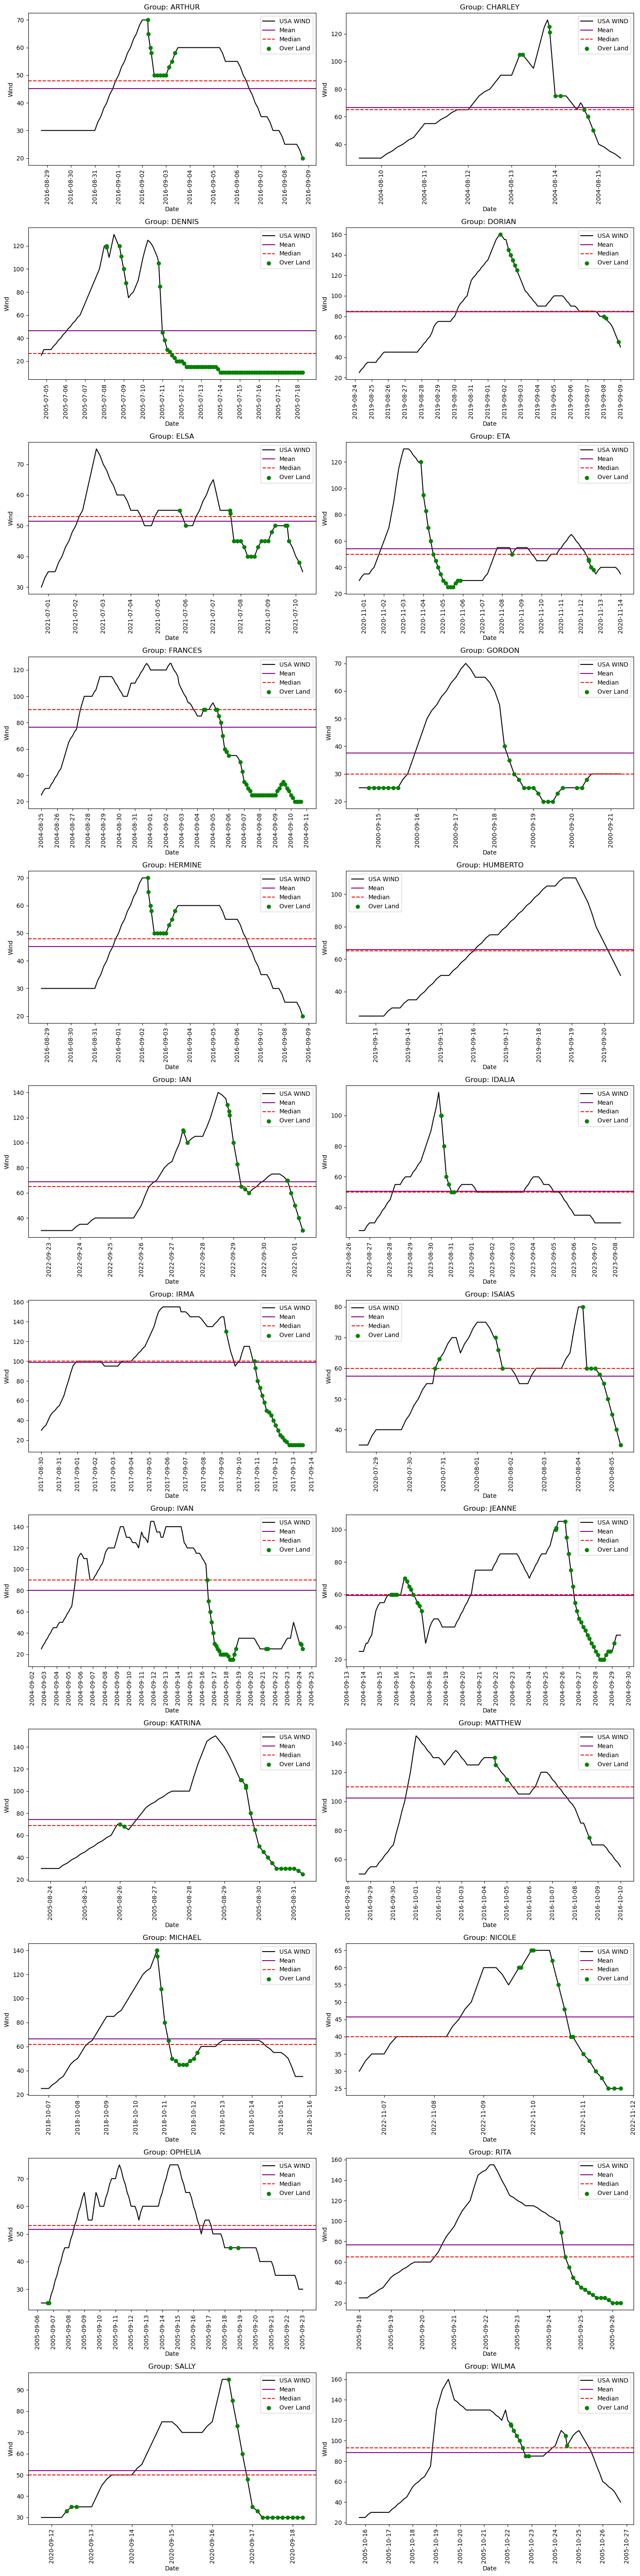

In [5]:
import math
import matplotlib.dates as mdates

# Convert ISO_TIME to datetime
df['ISO_TIME'] = pd.to_datetime(df['ISO_TIME'])

# Group by 'Name' and calculate mean and median for each group
grouped = df.groupby('Name')['USA WIND'].agg(['mean', 'median'])

# Determine the number of rows and columns for the grid
num_plots = len(grouped)
num_cols = 2  # You can adjust this value based on your preference
num_rows = math.ceil(num_plots / num_cols)

# Plotting
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))

# Flatten axes array for easy iteration
axes = axes.flatten()

for i, (name, group) in enumerate(grouped.iterrows()):
    ax = axes[i]
    group_data = df[df['Name'] == name]
    ax.plot(group_data['ISO_TIME'], group_data['USA WIND'], color='black', label='USA WIND')
    ax.axhline(y=group['mean'], color='purple', linestyle='-', label='Mean')
    ax.axhline(y=group['median'], color='red', linestyle='--', label='Median')
    
    # Add points where LAND is "Y"
    land_points = group_data[group_data['LAND'] == 'Y']
    ax.scatter(land_points['ISO_TIME'], land_points['USA WIND'], color='green', label='Over Land', zorder=5)
    
    ax.set_title(f'Group: {name}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Wind')
    ax.legend()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.xaxis.set_major_locator(mdates.DayLocator())
    plt.setp(ax.get_xticklabels(), rotation=90)  # Rotate x tick labels vertically

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In general we can see that wind speed builds throughout the life of the storm while it is on the ocean, then in general, once it gets over land, it starts to slow down.  The point where the storm arrives over land, the wind is still very much greater than the arithmetic mean or median wind of the storm.  This is why "where" it makes landfall is so important.  This point is the place that is going to be hit with the strongest winds of any other place over land (most of the time).  This is something that you likely knew if you watched the weather channel, but here is the proof!

Is there a better way to summarize this, and add the standard deviation?

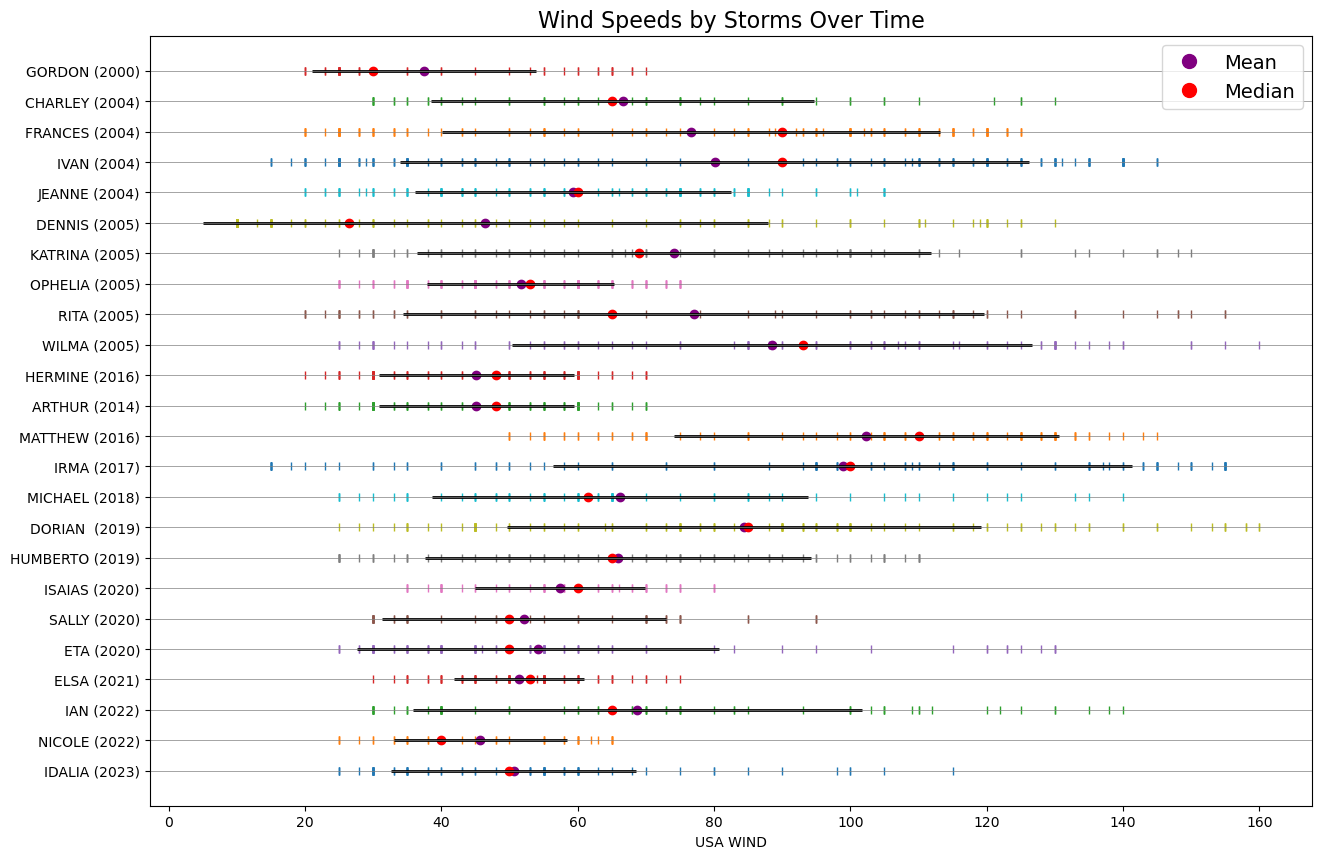

In [6]:
import matplotlib.lines as mlines

# Convert ISO_TIME to datetime
df['ISO_TIME'] = pd.to_datetime(df['ISO_TIME'])

# Sort the DataFrame by ISO_TIME within each group
df = df.sort_values(by=['ISO_TIME'], ascending=False)

# Group by 'Name' and calculate mean, median, and standard deviation for each group
grouped = df.groupby('Name')['USA WIND'].agg(['mean', 'median', 'std'])

# Plotting USA WIND on a series of stacked number lines
fig, ax = plt.subplots(figsize=(15, 10))

# Get unique names sorted by the first occurrence of ISO_TIME
unique_names = df.drop_duplicates(subset='Name').sort_values(by='ISO_TIME', ascending=False)['Name']

for i, name in enumerate(unique_names):
    group = df[df['Name'] == name]
    y = [i] * len(group)
    ax.plot(group['USA WIND'], y, '|', label=f'{name} - USA WIND')
    ax.plot(grouped.loc[name, 'mean'], i, 'o', color='purple', label=f'{name} - Mean')
    ax.plot(grouped.loc[name, 'median'], i, 'o', color='red', label=f'{name} - Median')
    ax.hlines(i, grouped.loc[name, 'mean'] - grouped.loc[name, 'std'], grouped.loc[name, 'mean'] + grouped.loc[name, 'std'], color='black', linestyle='-', linewidth=2)
    ax.axhline(y=i, color='gray', linestyle='-', linewidth=0.5)

    # Custom legend handles
mean_handle = mlines.Line2D([], [], color='purple', marker='o', linestyle='None', markersize=10, label='Mean')
median_handle = mlines.Line2D([], [], color='red', marker='o', linestyle='None', markersize=10, label='Median')

ax.set_yticks(range(len(unique_names)))
ax.set_yticklabels([f"{name} ({df[df['Name'] == name]['Year'].iloc[0]})" for name in unique_names])
ax.set_xlabel('USA WIND')
ax.set_title('Wind Speeds by Storms Over Time', fontsize=16)
ax.legend(handles=[mean_handle, median_handle], fontsize=14)

plt.show()

Now can we create a KDE plot of the aggregated means and overlay this with the entire dataset's KDE of Wind above?

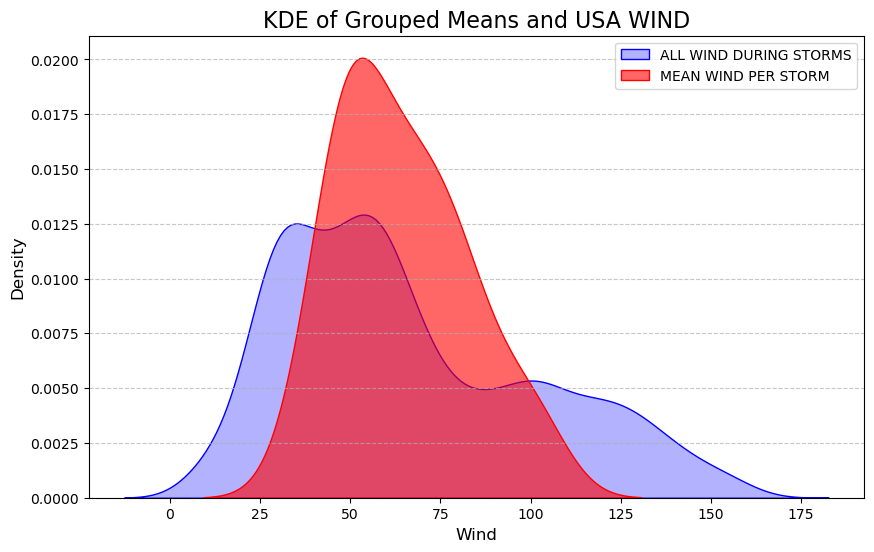

In [7]:
# Group by 'Name' and calculate mean for each group
grouped = df.groupby('Name')['USA WIND'].agg(['mean'])

# Group by 'Name' and calculate mean for each group
grouped = df.groupby('Name')['USA WIND'].agg(['mean'])

# Plotting KDE of means and KDE for 'USA WIND' on one plot
plt.figure(figsize=(10, 6))

# KDE for 'USA WIND' in the background
sns.kdeplot(data=df, x="USA WIND", fill=True, color="blue", alpha=0.3, label='ALL WIND DURING STORMS')

# KDE of grouped means in the foreground
sns.kdeplot(grouped['mean'], fill=True, color="red", alpha=0.6, label='MEAN WIND PER STORM')

plt.title('KDE of Grouped Means and USA WIND', fontsize=16)
plt.xlabel('Wind', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


So this KDE plot allows us to estimate the probability density function from the mean winds of each storm in comparison to the probability density function of the overall data set.  What does this mean?  The red grouped means KDE has a single peak, seen in normal distributions, it is also tall and narrow, suggesting that the arithmetic means for each storm are very close around the mean of all of those values, so there is low variance in the means.  The blue "All WIND DURING STORMS" KDE plot is approaching bimodal, and is wide, and skewed right, meaning that there is higher variance among the winds in the entire data set, and most of the winds are in the 25 to 75 mile per hour range, with less of the wind in the very high ranges.

RELATIONSHIPS BETWEEN THE DATA VARIABLES

Are there relationships between any of the variables in the dataset?  A linear regression between variables may illustrate if one variable has a causal relationship toward another.  So for this dataset, does the max pressure of the storm influence the life of the storm as measured by the total distance traveled?  Both variables are continuous, so linear regression can be used. The null hypothesis (H0) is that total distance traveled (y) is independent (or not related to) the minimum pressure of the storm (x).  Reminder - we use minimum pressure here, not maximum, becasue minimum pressure (low pressure) is the sign of the strong storm with strongest winds!!!

In [12]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
import geopandas as gpd
import scipy.stats as stats

# Function to calculate distance between two points (latitude and longitude)
from geopy.distance import geodesic

# Function to calculate distance between two points (latitude and longitude)
def calculate_distance(point1, point2):
    return geodesic(point1, point2).miles

# Calculate the sum of distances by group and sort by Year
groupedLR = df.groupby(['Year', 'Name'])
distances = {}

for (year, name), group in groupedLR:
    total_distance = 0
    points = list(zip(group['LAT'], group['LON']))
    for i in range(len(points) - 1):
        total_distance += calculate_distance(points[i], points[i + 1])
    distances[(year, name)] = total_distance

# Sort distances by Year
sorted_distances = dict(sorted(distances.items(), key=lambda item: item[0]))

# Find the min pressure for each 'Name'
min_pressure = groupedLR['WMO PRES'].min()

# Add min pressure as a column joined to 'Name' in sorted_distances
sorted_distances_with_pressure = []
for (year, name), distance in sorted_distances.items():
    sorted_distances_with_pressure.append({
        'Year': year,
        'Name': name,
        'Total Distance': distance,
        'Min Pressure': min_pressure.loc[(year, name)]
    })

# Convert to DataFrame for better readability
DistPresLR = pd.DataFrame(sorted_distances_with_pressure)

print(DistPresLR)

    Year      Name  Total Distance  Min Pressure
0   2000    GORDON     2375.230907         981.0
1   2004   CHARLEY     3303.684835         941.0
2   2004   FRANCES     5308.826388         935.0
3   2004      IVAN     7708.572316         910.0
4   2004    JEANNE     3676.146375         950.0
5   2005    DENNIS     3786.379482         930.0
6   2005   KATRINA     2111.594383         902.0
7   2005   OPHELIA     5398.829765         976.0
8   2005      RITA     2472.821624         895.0
9   2005     WILMA     3485.225548         882.0
10  2014    ARTHUR     2560.489228         981.0
11  2016   HERMINE     2560.489228         981.0
12  2016   MATTHEW     3008.810647         934.0
13  2017      IRMA     4793.310476         914.0
14  2018   MICHAEL     5312.890591         919.0
15  2019   DORIAN      4830.430707         910.0
16  2019  HUMBERTO     2075.938503         950.0
17  2020       ETA     3942.738997         922.0
18  2020    ISAIAS     3481.771931         986.0
19  2020     SALLY  

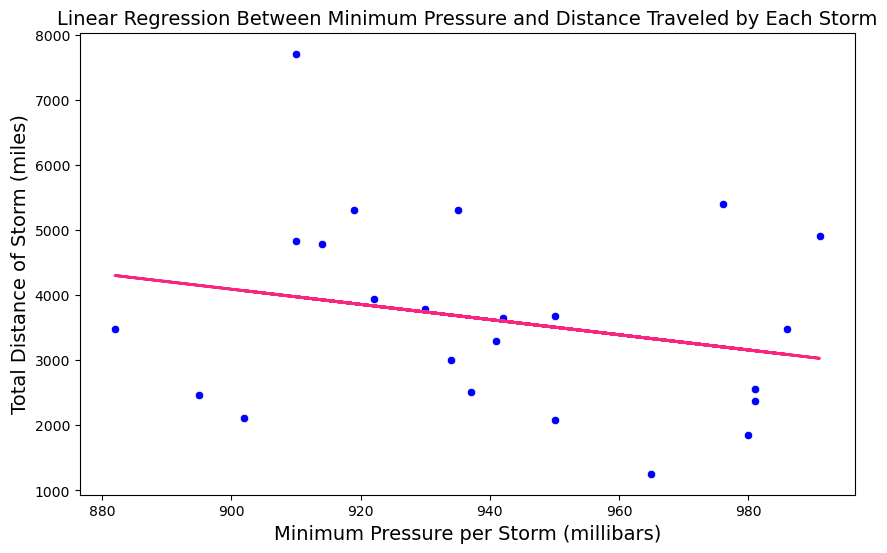

In [13]:
### Linear Regression of Minimum Pressure and Total Distance Traveled

# Extract the relevant columns
X = DistPresLR[['Min Pressure']]
y = DistPresLR['Total Distance']

# Create and fit the linear regression model
modelDistPres = LinearRegression()
modelDistPres.fit(X, y)

# Predict values
y_predDistPres = modelDistPres.predict(X)

# Plot the data and the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Min Pressure', y='Total Distance', data=DistPresLR, color='blue')
plt.plot(DistPresLR['Min Pressure'], y_predDistPres, color='#F62681', linewidth=2)
plt.xlabel('Minimum Pressure per Storm (millibars)', fontsize=14)
plt.ylabel('Total Distance of Storm (miles)', fontsize=14)
plt.title('Linear Regression Between Minimum Pressure and Distance Traveled by Each Storm', fontsize=14)
plt.show()

What does this tell us?  Visually there is a slight correlation.  But let's quantify that by calculating the residuals, then doing some tests to calculate the p-value of the linear regression.

In [14]:
# Calculate residuals
residuals = y - y_predDistPres

# Print residuals
#print("Residuals:")
#print(residuals)

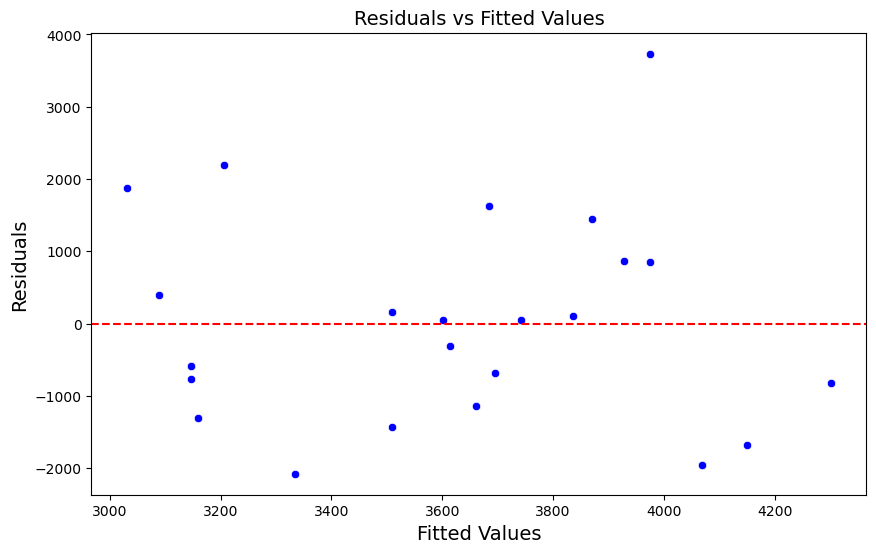

In [15]:
# Plot residuals against the fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_predDistPres, y=residuals, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize=14)
plt.show()

The redline is flat at zero, and the residuals are normally distributed around zero.  But we can further show the normal distribution of the residual in a Q-Q plot.  

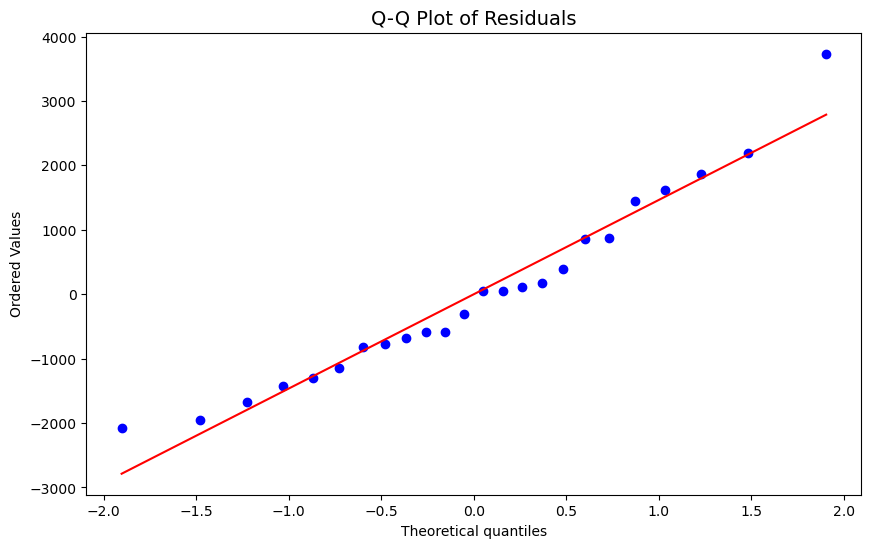

In [16]:
# Create a Q-Q plot of residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals', fontsize=14)
plt.show()

The residuals fall close and around the red line, especially in the middle.  So the residuals are normally distributed.

Shapiro-Wilk test statistic: 0.9542115330696106, p-value: 0.33340176939964294


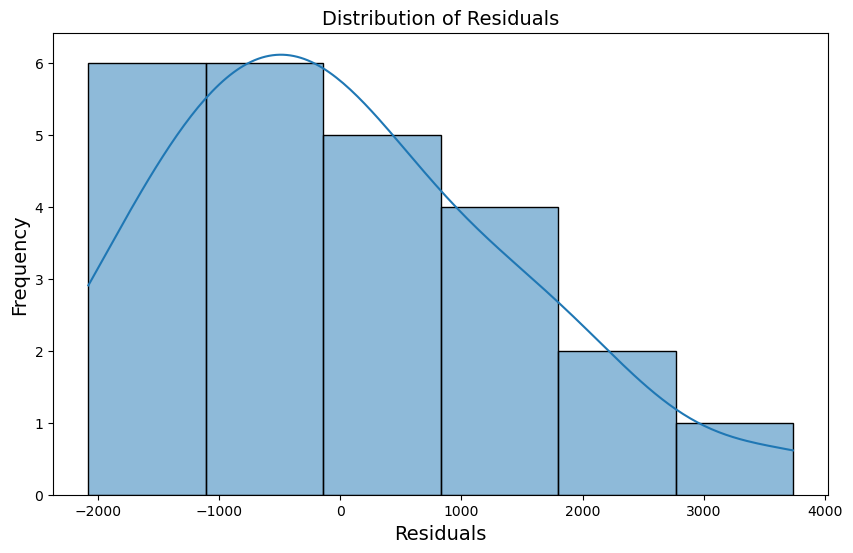

In [17]:

# Perform Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(residuals)
print(f"Shapiro-Wilk test statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")

# Plot the distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Residuals', fontsize=14)
plt.show()

Since the p-value is greater than 0.05, we fail to reject the null hypothesis. That is, we can't reject that total distance traveled is not related to the maximum pressure of the storm. But what is the strength of the relationship, if it is there?  The coefficient of determination will give us a value that helps us better quantify the strength of the significant relationship.

In [18]:
from sklearn.metrics import r2_score
# Calculate the coefficient of determination (R^2)
r2 = r2_score(y, y_predDistPres)

print(f"Coefficient of Determination (R^2): {r2}")

Coefficient of Determination (R^2): 0.06379759880693758


So 0.06, or 6% of the variation in the dependent variable (distance that the storm travels) can be explained by knowing the minimum pressure of the storm.  That is very small.  So the relationship is not very strong, and you could even say there is really no relationship.  In other words the proportion of variation explained by the independent variable is so small, that we can not be very confident in the causality relationship of minimum pressure in a storm to the distance that the storm travels. 

### SECTION 2: 

### PARAMETRIC and NON-PARAMETRIC stats: 

We're going to cover T-tests Parametric and KS tests non-parametric in this section. 

Can we do any other tests to further evaluate the relationship of these two variables?
Let's start with a basic T-test.  This is a parametric test.

In [19]:
import numpy as np

from scipy.stats import ttest_ind
# Perform t-test on Min Pressure and Total Distance
t_stat, p_value = ttest_ind(DistPresLR['Min Pressure'], DistPresLR['Total Distance'])

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -8.79140738100449
P-value: 2.072780866957493e-11


The negative t-statistic indicates that the mean of Minimum Pressure is significantly lower than the mean of Total Distance. The extremely low p-value suggests that this difference is statistically significant. But as shown above the confidence associated with their relationship is very low (6% from above).

##### Non-Parametric! KS-Test

Lets explore some NON-PARAMETRIC statistics, specifically the Kolmogorov-Smirnov (KS) test. The KS Test is a nonparametric statistical test that compares two distributions to determine if they are different. 

In [20]:
from scipy.stats import ks_2samp
import pandas as pd


data = pd.read_csv("GEO557Tropical_Storm_Dataset_CLEAN.csv")
# Group by 'Name' and 'Year' to get the maximum 'USA WIND' for each hurricane
max_wind_per_hurricane = data.groupby(['Name', 'Year'])['USA WIND'].max().reset_index()

# Split into two time periods
first_half = max_wind_per_hurricane[(max_wind_per_hurricane['Year'] >= 2000) & 
                                    (max_wind_per_hurricane['Year'] <= 2011)]['USA WIND'].dropna()
second_half = max_wind_per_hurricane[(max_wind_per_hurricane['Year'] >= 2012) & 
                                     (max_wind_per_hurricane['Year'] <= 2023)]['USA WIND'].dropna()

# Perform the KS test
ks_statistic, p_value = ks_2samp(first_half, second_half)

# Output results
print(f"KS Statistic: {ks_statistic}")
print(f"P-Value: {p_value}")

# Interpret results
if p_value < 0.05:
    print("The distributions of maximum hurricane winds are significantly different (p < 0.05).")
else:
    print("The distributions of maximum hurricane winds are not significantly different between 2000-2011 and 2012-2023 (p ≥ 0.05).")

KS Statistic: 0.2714285714285714
P-Value: 0.6796359067862635
The distributions of maximum hurricane winds are not significantly different between 2000-2011 and 2012-2023 (p ≥ 0.05).


In [21]:
# Based on this analysis, the results suggest wind speed distributions aren't different enough to be statistically significant across the two time frames.
# Lets try another KS test to see if we find anything else interesting. 

In [22]:
from scipy.stats import ks_2samp
import pandas as pd

# Load data
data = pd.read_csv("GEO557Tropical_Storm_Dataset_CLEAN.csv")

# Group by 'Name' and 'Year' to get the minimum 'USA PRES' for each hurricane
min_pres_per_hurricane = data.groupby(['Name', 'Year'])['USA PRES'].min().reset_index()

# Split into two time periods
first_half = min_pres_per_hurricane[(min_pres_per_hurricane['Year'] >= 2000) & 
                                    (min_pres_per_hurricane['Year'] <= 2011)]['USA PRES'].dropna()
second_half = min_pres_per_hurricane[(min_pres_per_hurricane['Year'] >= 2012) & 
                                     (min_pres_per_hurricane['Year'] <= 2023)]['USA PRES'].dropna()

# Perform the KS test
ks_statistic, p_value = ks_2samp(first_half, second_half)


# Output results
print(f"KS Statistic: {ks_statistic}")
print(f"P-Value: {p_value}")

# Interpret results
if p_value < 0.05:
    print("The distributions of minimum hurricane pressures are significantly different (p < 0.05).")
else:
    print("The distributions of minimum hurricane pressures are not significantly different between 2000-2011 and 2012-2023 (p ≥ 0.05).")

KS Statistic: 0.32857142857142857
P-Value: 0.46748410202441715
The distributions of minimum hurricane pressures are not significantly different between 2000-2011 and 2012-2023 (p ≥ 0.05).


These results state the same thing as the last ones, so based on this dataset we can't detect a difference between the max pressures between 2000 and 2011 vs. 2012 and 2023

In the next block of code we're going to do a few KS tests to see if la nina, el nino, or neutral ENSO will have a different max wind distribution. 

In [23]:
from scipy.stats import ks_2samp
import pandas as pd

# Load merged dataset
data = pd.read_csv("Tropical_Storm_Dataset_AND_ENSO.csv")

# Group by 'Name' and 'Year' to get the maximum 'USA WIND' for each hurricane
max_wind_per_hurricane = data.groupby(['Name', 'Year'])['USA WIND'].max().reset_index()

# Merge the ENSO phase information back in based on the year
max_wind_per_hurricane = pd.merge(max_wind_per_hurricane, data[['Year', 'ENSO']].drop_duplicates(), on='Year', how='left')

# Filter by ENSO phases
el_nino = max_wind_per_hurricane[max_wind_per_hurricane['ENSO'] == 'El Niño']['USA WIND'].dropna()
la_nina = max_wind_per_hurricane[max_wind_per_hurricane['ENSO'] == 'La Niña']['USA WIND'].dropna()
neutral = max_wind_per_hurricane[max_wind_per_hurricane['ENSO'] == 'Neutral']['USA WIND'].dropna()

# Perform KS test between El Niño and La Niña
ks_statistic_elnino_lanina, p_value_elnino_lanina = ks_2samp(el_nino, la_nina)
print("El Niño vs La Niña:")
print(f"KS Statistic: {ks_statistic_elnino_lanina}")
print(f"P-Value: {p_value_elnino_lanina}")
if p_value_elnino_lanina < 0.05:
    print("Distributions of max USA WIND are significantly different between El Niño and La Niña (p < 0.05).")
else:
    print("Distributions of max USA WIND are not significantly different between El Niño and La Niña (p ≥ 0.05).")

# Perform KS test between El Niño and Neutral
ks_statistic_elnino_neutral, p_value_elnino_neutral = ks_2samp(el_nino, neutral)
print("\nEl Niño vs Neutral:")
print(f"KS Statistic: {ks_statistic_elnino_neutral}")
print(f"P-Value: {p_value_elnino_neutral}")
if p_value_elnino_neutral < 0.05:
    print("Distributions of max USA WIND are significantly different between El Niño and Neutral (p < 0.05).")
else:
    print("Distributions of max USA WIND are not significantly different between El Niño and Neutral (p ≥ 0.05).")

# Perform KS test between La Niña and Neutral
ks_statistic_lanina_neutral, p_value_lanina_neutral = ks_2samp(la_nina, neutral)
print("\nLa Niña vs Neutral:")
print(f"KS Statistic: {ks_statistic_lanina_neutral}")
print(f"P-Value: {p_value_lanina_neutral}")
if p_value_lanina_neutral < 0.05:
    print("Distributions of max USA WIND are significantly different between La Niña and Neutral (p < 0.05).")
else:
    print("Distributions of max USA WIND are not significantly different between La Niña and Neutral (p ≥ 0.05).")


El Niño vs La Niña:
KS Statistic: 0.4166666666666667
P-Value: 0.8857142857142858
Distributions of max USA WIND are not significantly different between El Niño and La Niña (p ≥ 0.05).

El Niño vs Neutral:
KS Statistic: 0.3137254901960784
P-Value: 0.9122807017543859
Distributions of max USA WIND are not significantly different between El Niño and Neutral (p ≥ 0.05).

La Niña vs Neutral:
KS Statistic: 0.6323529411764706
P-Value: 0.1069340016708438
Distributions of max USA WIND are not significantly different between La Niña and Neutral (p ≥ 0.05).


Looks like MAX wind are not significantly different between the three ENSO types and this dataset. 

In [24]:
from scipy.stats import ks_2samp
import pandas as pd

# Load merged dataset
data = pd.read_csv("Tropical_Storm_Dataset_AND_ENSO.csv")

# Count the number of storms
storm_counts_per_year = data.groupby(['Year', 'ENSO'])['Name'].nunique().reset_index(name='Storm_Count')

#filter storm counts
el_nino_counts = storm_counts_per_year[storm_counts_per_year['ENSO'] == 'El Niño']['Storm_Count']
la_nina_counts = storm_counts_per_year[storm_counts_per_year['ENSO'] == 'La Niña']['Storm_Count']
neutral_counts = storm_counts_per_year[storm_counts_per_year['ENSO'] == 'Neutral']['Storm_Count']

# Perform KS tests
ks_statistic_elnino_lanina, p_value_elnino_lanina = ks_2samp(el_nino_counts, la_nina_counts)
print("El Niño vs La Niña (Number of Storms per Year):")
print(f"KS Statistic: {ks_statistic_elnino_lanina}")
print(f"P-Value: {p_value_elnino_lanina}")

if p_value_elnino_lanina < 0.05:
    print("Distributions of storm counts per year are significantly different between El Niño and La Niña (p < 0.05).")
else:
    print("Distributions of storm counts per year are not significantly different between El Niño and La Niña (p ≥ 0.05).")

ks_statistic_elnino_neutral, p_value_elnino_neutral = ks_2samp(el_nino_counts, neutral_counts)
print("\nEl Niño vs Neutral (Number of Storms per Year):")
print(f"KS Statistic: {ks_statistic_elnino_neutral}")
print(f"P-Value: {p_value_elnino_neutral}")
if p_value_elnino_neutral < 0.05:
    print("Distributions of storm counts per year are significantly different between El Niño and Neutral (p < 0.05).")
else:
    print("Distributions of storm counts per year are not significantly different between El Niño and Neutral (p ≥ 0.05).")

# Perform KS test between La Niña and Neutral storm counts
ks_statistic_lanina_neutral, p_value_lanina_neutral = ks_2samp(la_nina_counts, neutral_counts)
print("\nLa Niña vs Neutral (Number of Storms per Year):")
print(f"KS Statistic: {ks_statistic_lanina_neutral}")
print(f"P-Value: {p_value_lanina_neutral}")
if p_value_lanina_neutral < 0.05:
    print("Distributions of storm counts per year are significantly different between La Niña and Neutral (p < 0.05).")
else:
    print("Distributions of storm counts per year are not significantly different between La Niña and Neutral (p ≥ 0.05).")



El Niño vs La Niña (Number of Storms per Year):
KS Statistic: 0.16666666666666666
P-Value: 1.0
Distributions of storm counts per year are not significantly different between El Niño and La Niña (p ≥ 0.05).

El Niño vs Neutral (Number of Storms per Year):
KS Statistic: 0.42857142857142855
P-Value: 0.8888888888888888
Distributions of storm counts per year are not significantly different between El Niño and Neutral (p ≥ 0.05).

La Niña vs Neutral (Number of Storms per Year):
KS Statistic: 0.42857142857142855
P-Value: 0.7000000000000001
Distributions of storm counts per year are not significantly different between La Niña and Neutral (p ≥ 0.05).


It looks like the counts of storms per year are not siginificantly different between the three ENSO types. 
So this data set is not showing alot with KS tests, that could suggest, either these distributions aren't significantly different or maybe our dataset isn't large enough.  
My hypothesis at this time, is that the size of the dataset of 23 storms might not be large enough or diverse enough to capture trends in the distributions. 

### The End

##### Thank you for coming on this stats journey with us!